# Long Short-Term Memory (LSTM)

## What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

worth watching: https://www.youtube.com/watch?v=b61DPVFX03I&t=329s

## Our LSTM Implementation:

Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import src.lstm as lstm
import src.test_bench as bench

Powering on test bench
testing metric='node_mem', app='node_mem'.
Fetching data for metric='node_mem', app='node_mem'.
Making an instance of the class we want to test
LSTMPredictor(
  (linear): Linear(in_features=32, out_features=1, bias=True)
)
Starting training loop
Step 0
loss: 0.02686740221341098
loss: 0.026864499954455345
loss: 0.02686063412882211
loss: 0.026826668090467253
loss: 0.026768392179675117
loss: 0.026663466591792608
loss: 0.026529329393186907
loss: 0.026386072200467077
loss: 0.026384282015217697
loss: 0.026384129176965518
loss: 0.026384082671775187
loss: 0.026383901885275556
loss: 0.026383592319166184
loss: 0.026382888182419822
loss: 0.026381491950511173
loss: 0.026379151890165976
loss: 0.026376321739321567
loss: 0.02637333501106659
loss: 0.026370737821089063
loss: 0.02636963583898194
Step 1
loss: 0.02636841957535075
loss: 0.026366104291093304
loss: 0.026360929313275345
loss: 0.026349043237082054
loss: 0.026321749479793058
loss: 0.02625990769666584
loss: 0.0261242933736

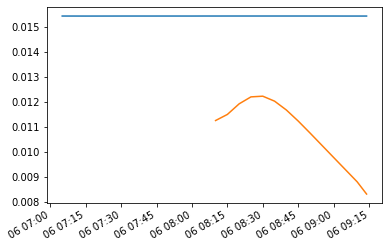

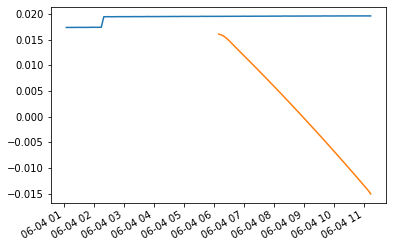

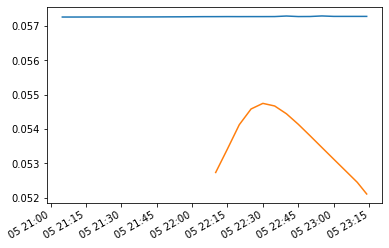

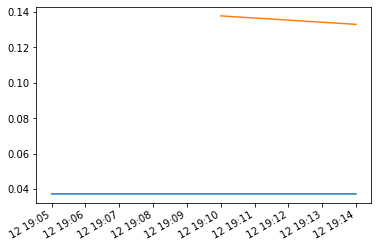

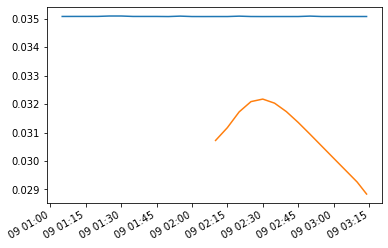

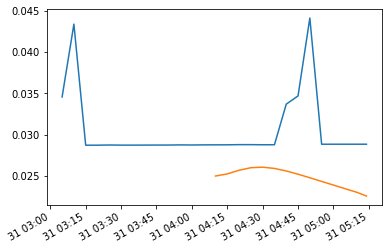

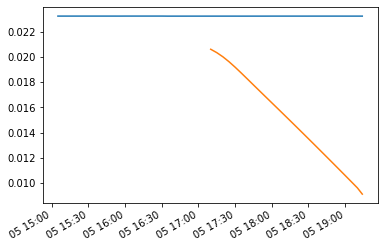

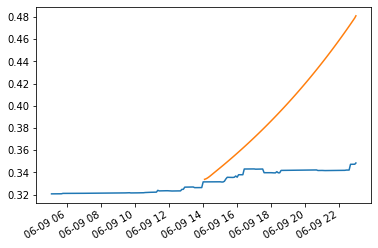

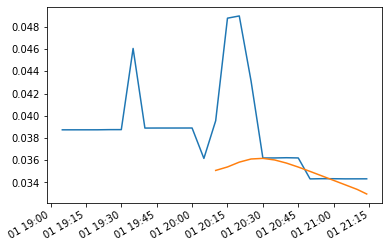

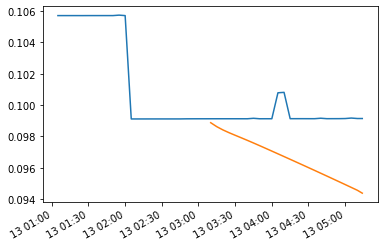

Done with metric='node_mem', app='node_mem', the sum of the mse over the test batch is = 0.6873994356881614.
Powering off test bench


In [2]:
tb = bench.TestBench(
    class_to_test=lstm.LSTMTester,
    metrics_and_apps_to_test=[("node_mem", "moc/smaug")],
    path_to_data="./data/"
)
tb.run_training_and_tests()